<a href="https://colab.research.google.com/github/kinantianggraeni/Heart-Disease-Decision-Tree/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Latihan Decision Tree**


*   Nama : Kinanti Anggraeni
*   NIM  : 4112322010

Menggunakan datasets **Heart** dengan variabel target Heart Disease. Tujuan prediksi di sini adalah untuk mengklasifikasikan apakah pasien memiliki penyakit jantung berdasarkan fitur-fitur yang relevan.


In [123]:
from google.colab import drive  # Import the drive module from google.colab

# Mount Google Drive to the correct directory
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [125]:
path = '/content/heart.csv'
df = pd.read_csv(path)

In [126]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Analisis Eksplorasi Data (EDA)**

In [128]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [129]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Plotting distributions

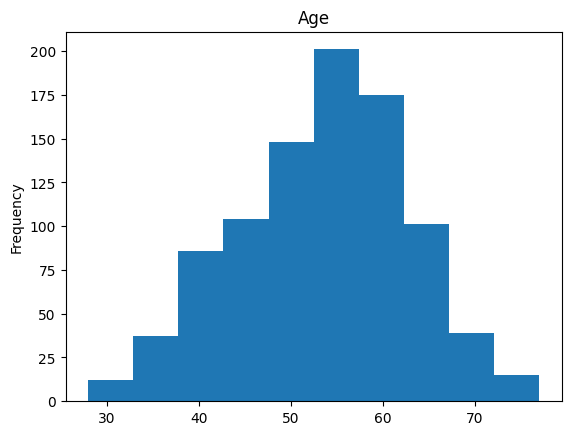

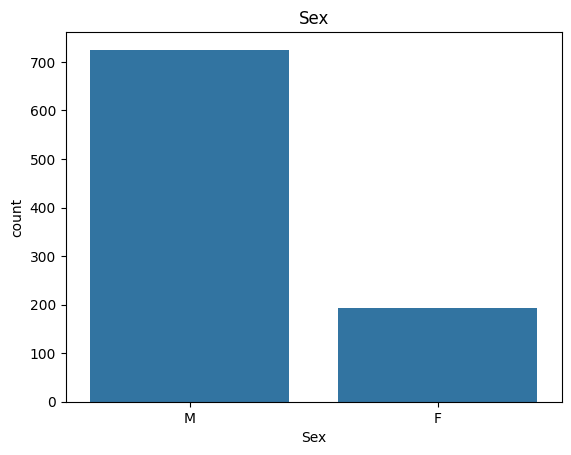

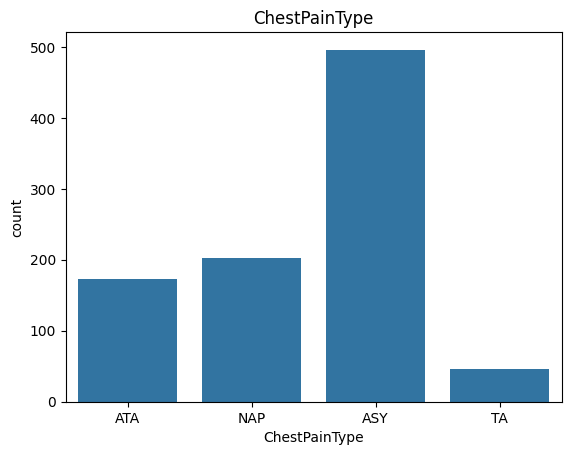

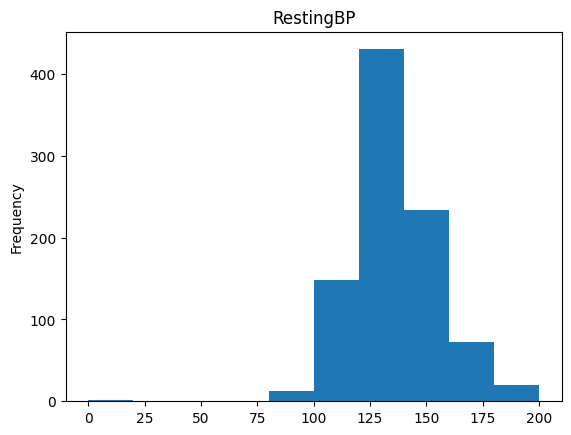

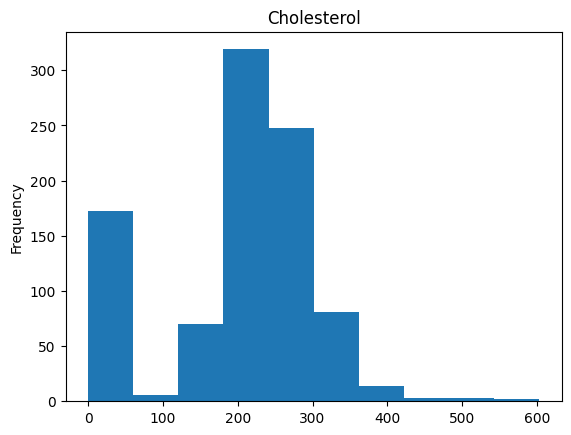

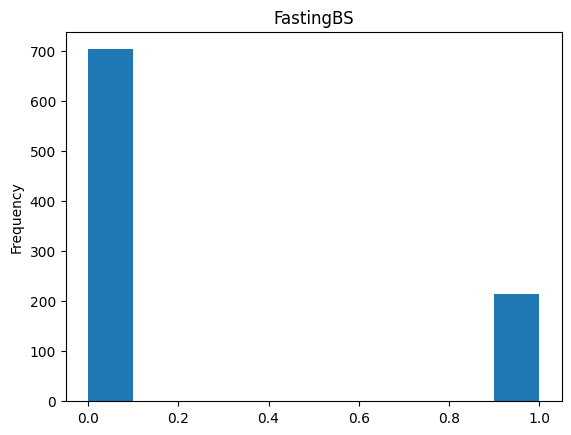

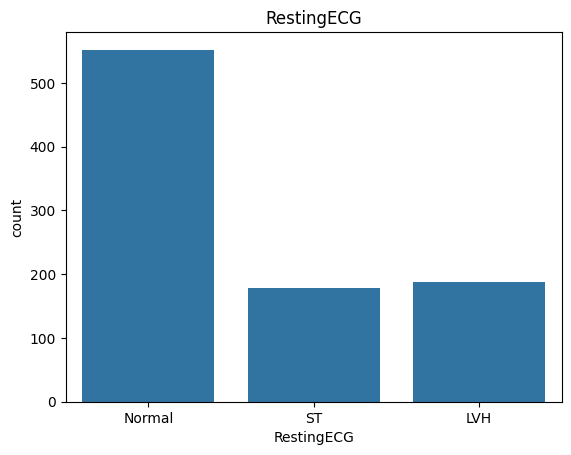

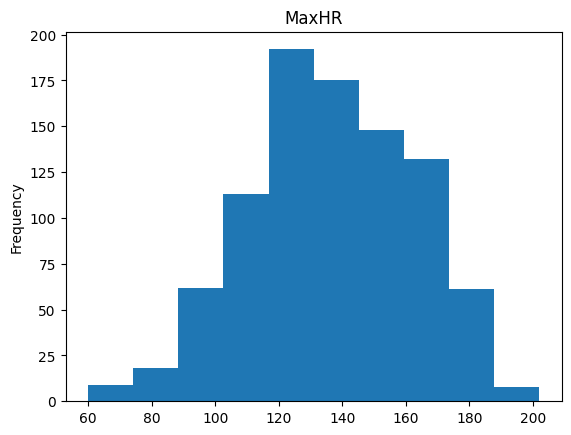

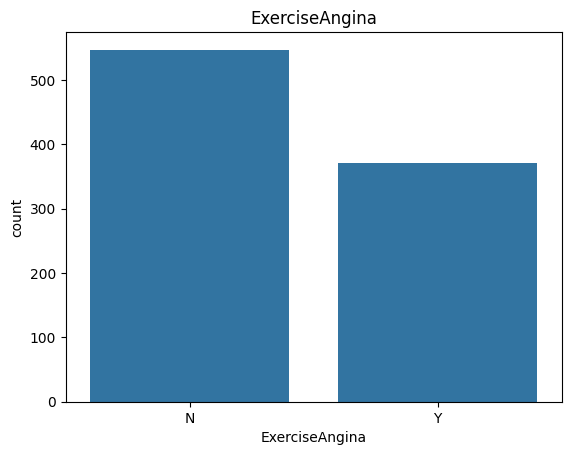

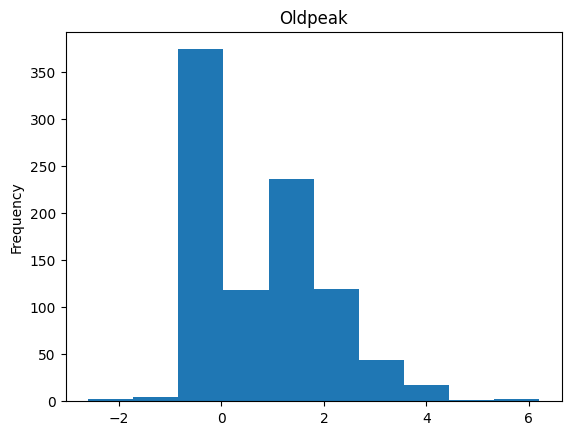

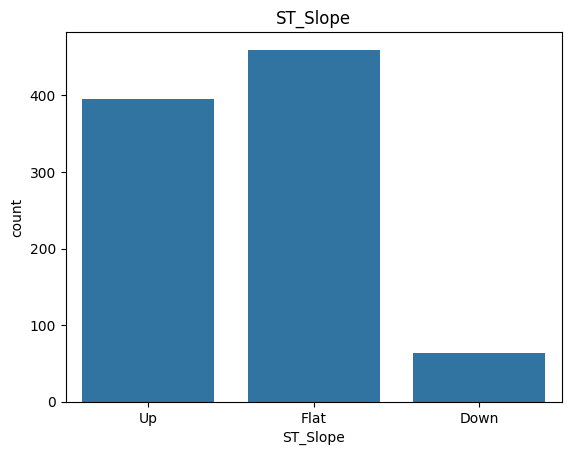

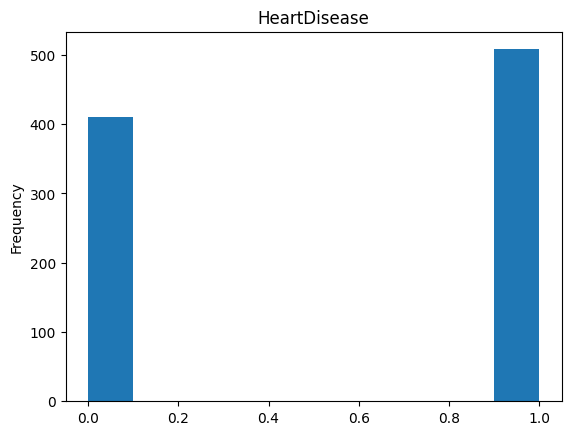

In [130]:
for feat in df.columns:
  if (df[feat].dtype == 'int') or (df[feat].dtype == 'float'):
    df[feat].plot(kind='hist')
    plt.title(feat)
    plt.show()
  else:
    sns.countplot(data=df, x=feat)
    plt.title(feat)
    plt.show()


Plotting bivariate relationships

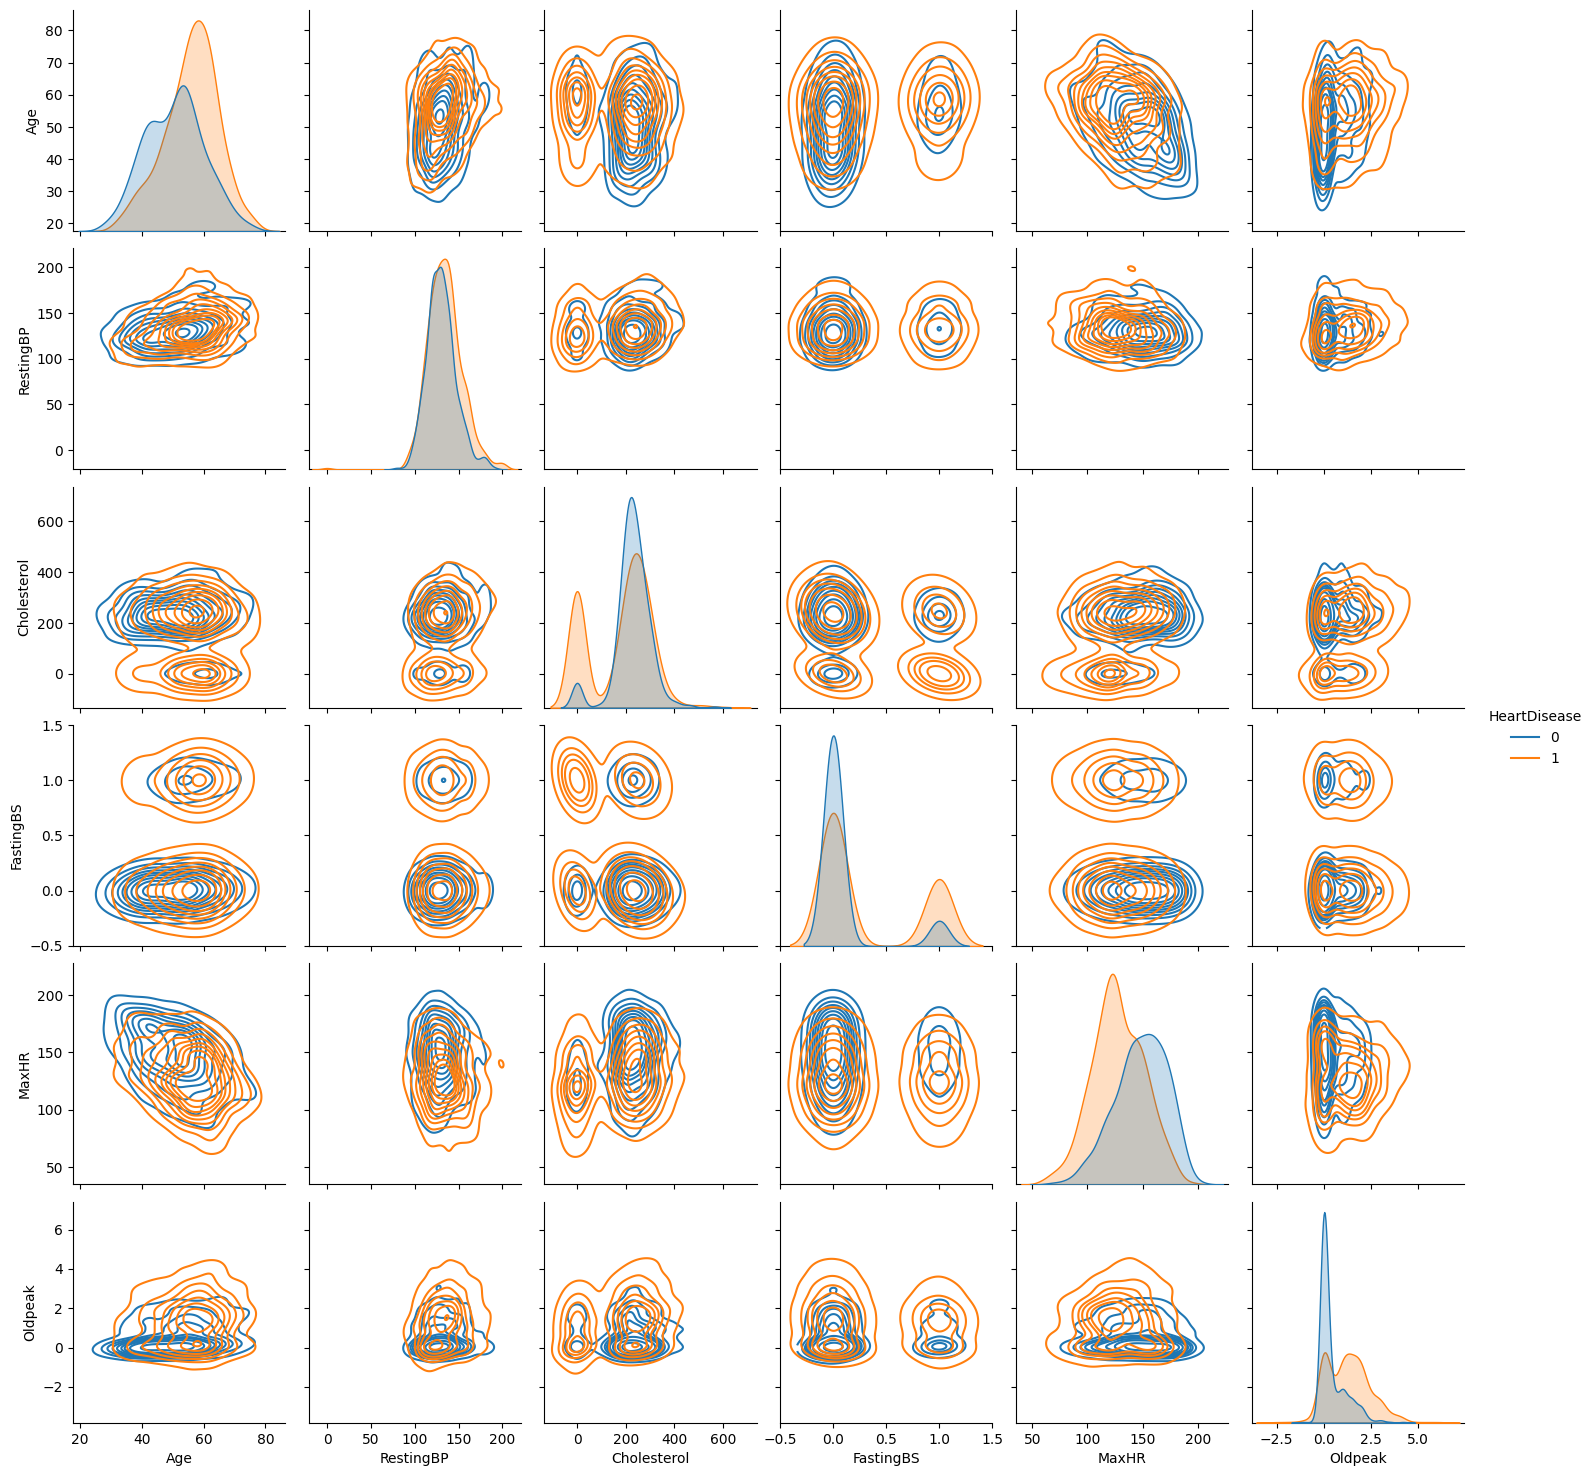

In [131]:
sns.pairplot(data=df, hue='HeartDisease', kind='kde')

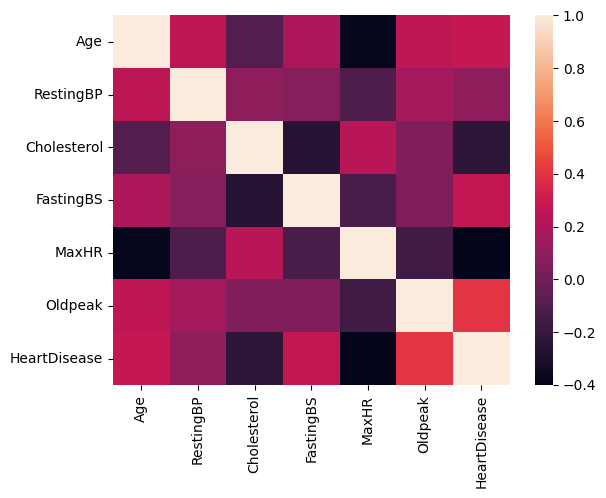

In [132]:
num_df = df.select_dtypes(include=np.number)  # Select numeric columns only
corr = num_df.corr()

sns.heatmap(corr)
plt.show()

In [133]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlation with 'HeartDisease' for numeric columns
correlation = numeric_df.corrwith(df['HeartDisease']).sort_values()

print(correlation)

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
dtype: float64


**Preprocessing Data**

In [134]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Menangani Outlier

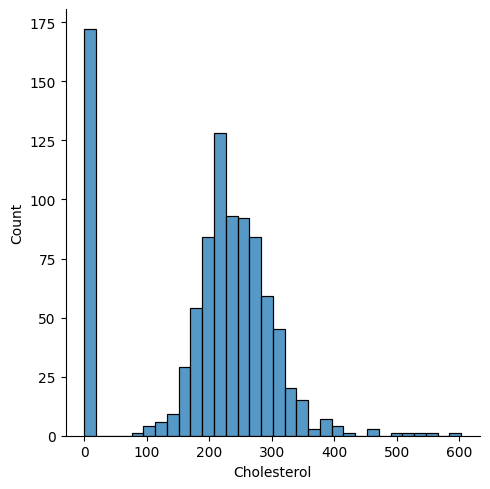

In [135]:
sns.displot(data=df, x='Cholesterol')

In [136]:
df['Cholesterol'] = df['Cholesterol'].clip(upper=450)

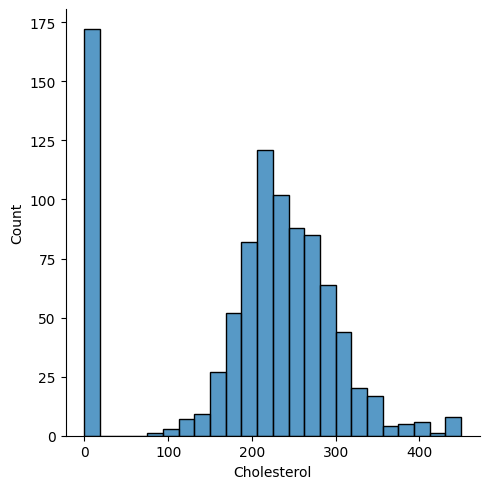

In [137]:
sns.displot(data=df, x='Cholesterol')

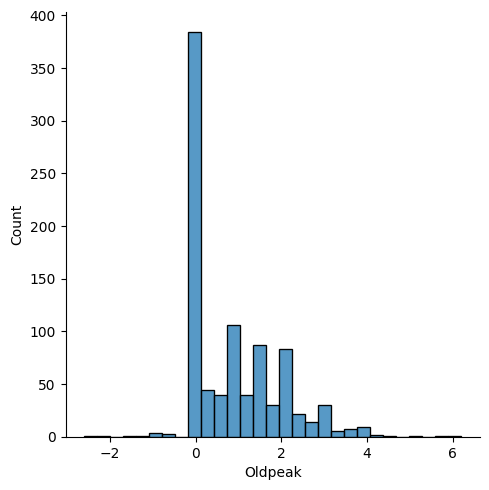

In [138]:
sns.displot(data=df, x='Oldpeak')

In [139]:
df['Oldpeak'] = df['Oldpeak'].clip(lower=-.5, upper=4)

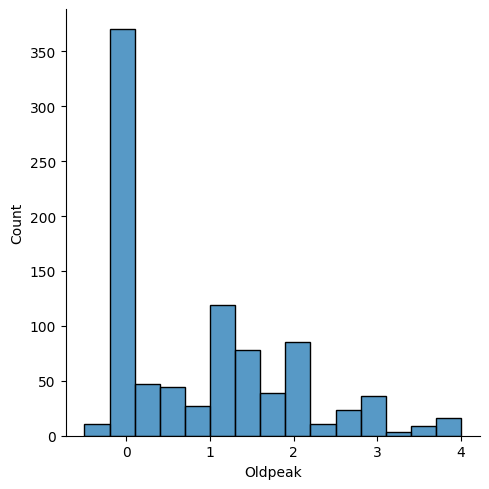

In [140]:
sns.displot(data=df, x='Oldpeak')

Mengubah Kategori Menjadi Dummy Variables

In [141]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [143]:
categories = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [144]:
df = pd.get_dummies(df, columns=categories)

**Modeling**

Train test split

In [145]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [146]:
features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']
target = ['HeartDisease']

In [147]:
x = df[features]
y = df[target]

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

Data dibagi menjadi data pelatihan dan data pengujian dengan proporsi 70:30.

Unpruned Decision Tree

In [149]:
unpruned_tree = DecisionTreeClassifier().fit(x_train, y_train)

In [150]:
score_train_unpruned_tree = unpruned_tree.score(x_train, y_train)
score_test_unpruned_tree = unpruned_tree.score(x_test, y_test)

In [151]:
train_scores = [score_train_unpruned_tree]
test_scores = [score_test_unpruned_tree]
model_list = ['unpruned_tree']
score_dict = {
    'train_score':train_scores,
    'test_score':test_scores
}
df_score = pd.DataFrame(score_dict, index=model_list)
df_score

,train_score,test_score
unpruned_tree,1.0,0.753623


Def confusion matrix

In [152]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,data=x_test,labels=[1, 0]):
    '''
    model : classifier to predict values of x
    y_actual : ground truth

    '''
    y_predict = model.predict(data)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='', cmap='crest')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

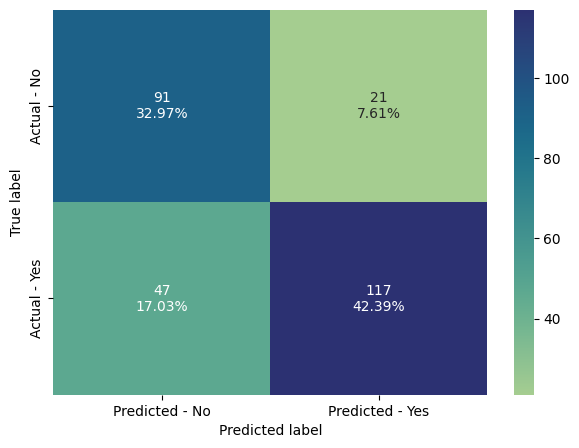

In [153]:
make_confusion_matrix(unpruned_tree, y_test)

unpruned tree plot

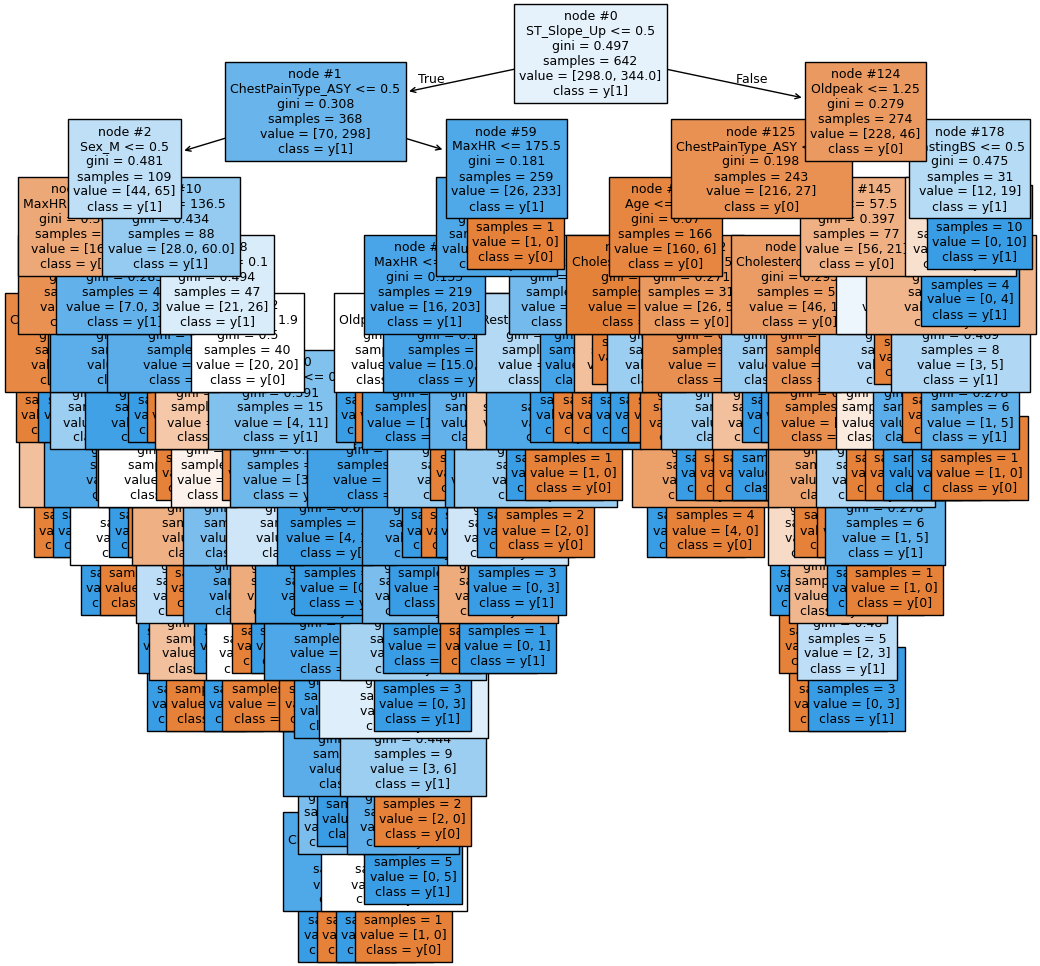

In [154]:
plt.figure(figsize=(12,12))
plot_tree(unpruned_tree, feature_names=x.columns, filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()


pre_pruned_tree

In [155]:
prepruned_tree = DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=10, max_features=.6).fit(x_train, y_train)

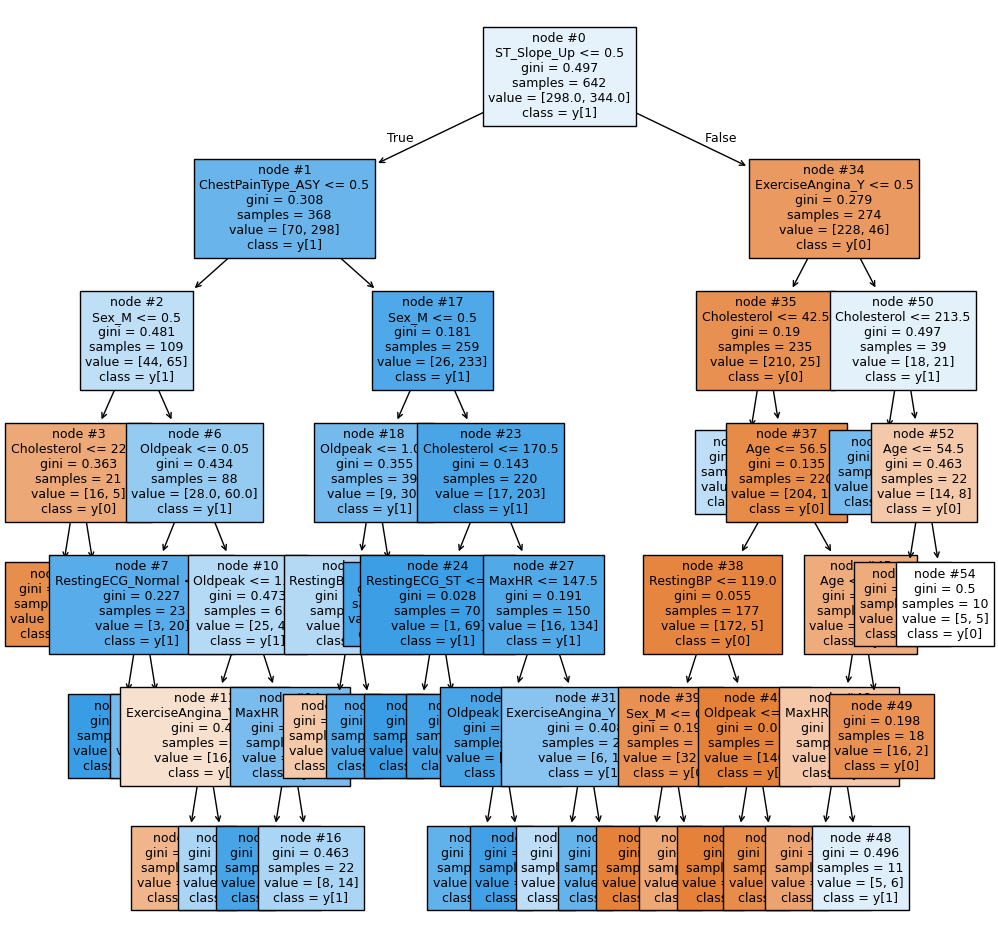

In [156]:
plt.figure(figsize=(12,12))
plot_tree(prepruned_tree, feature_names=x.columns, filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [157]:
score_train_prepruned_tree = prepruned_tree.score(x_train, y_train)
score_test_prepruned_tree = prepruned_tree.score(x_test, y_test)

In [158]:
train_scores = [score_train_unpruned_tree, score_train_prepruned_tree]
test_scores = [score_test_unpruned_tree, score_test_prepruned_tree]
model_list = ['unpruned_tree', 'prepruned_tree']
score_dict = {
    'train_score':train_scores,
    'test_score':test_scores
}
df_score = pd.DataFrame(score_dict, index=model_list)
df_score

,train_score,test_score
unpruned_tree,1.000000,0.753623
prepruned_tree,0.872274,0.840580



post_pruned_tree

In [159]:
postpruned = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=10, max_features=.8).fit(x_train, y_train)


cost_complexity_pruning_path

In [160]:
path = postpruned.cost_complexity_pruning_path(x_train, y_train)
path = pd.DataFrame(path)
path

,ccp_alphas,impurities
0,0.000000,0.172276
1,0.000000,0.172276
2,0.000194,0.172470
3,0.000218,0.172688
4,0.000485,0.173173
5,0.000531,0.174236
6,0.000653,0.174888
7,0.000680,0.175568
8,0.000785,0.176353
9,0.001257,0.178867


<Axes: xlabel='ccp_alphas'>

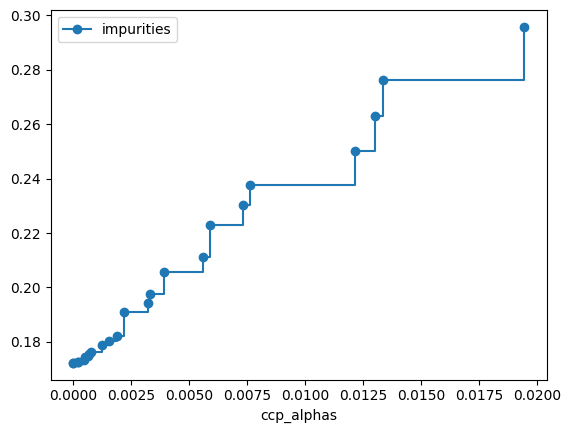

In [161]:
path[:-1].plot(x='ccp_alphas', y='impurities', marker='o', drawstyle='steps-post')

In [162]:
trees = []
for ccp_alpha in path['ccp_alphas']:
  tree = DecisionTreeClassifier(max_depth=10, min_samples_split=15, min_samples_leaf=15, max_features=.8, ccp_alpha=ccp_alpha).fit(x_train, y_train)
  trees.append(tree)

  print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      trees[-1].tree_.node_count, ccp_alpha))

Number of nodes in the last tree is: 51 with ccp_alpha: 0.0
Number of nodes in the last tree is: 49 with ccp_alpha: 0.0
Number of nodes in the last tree is: 47 with ccp_alpha: 0.0001941983250394498
Number of nodes in the last tree is: 45 with ccp_alpha: 0.00021754167707637015
Number of nodes in the last tree is: 45 with ccp_alpha: 0.0004854958125986141
Number of nodes in the last tree is: 43 with ccp_alpha: 0.0005311234283196936
Number of nodes in the last tree is: 43 with ccp_alpha: 0.0006527221480492522
Number of nodes in the last tree is: 43 with ccp_alpha: 0.0006796941376380622
Number of nodes in the last tree is: 43 with ccp_alpha: 0.0007845852082612225
Number of nodes in the last tree is: 33 with ccp_alpha: 0.0012570494257269351
Number of nodes in the last tree is: 37 with ccp_alpha: 0.0015293118096856451
Number of nodes in the last tree is: 29 with ccp_alpha: 0.00188803927121684
Number of nodes in the last tree is: 27 with ccp_alpha: 0.002212308919625993
Number of nodes in the l

In [163]:
node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
path['node_counts'], path['depth'] = node_counts, depth

<Axes: xlabel='ccp_alphas'>

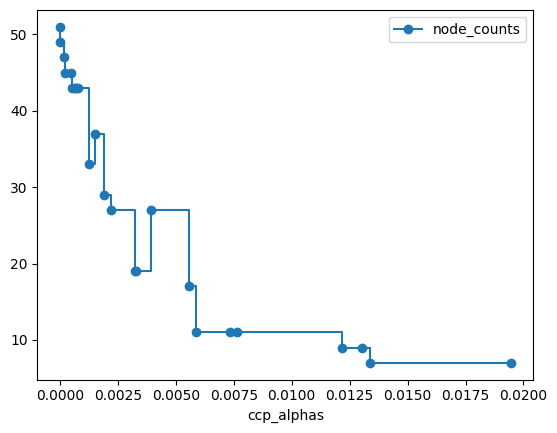

In [164]:
path[:-1].plot(x='ccp_alphas', y='node_counts', marker='o', drawstyle='steps-post')

<Axes: xlabel='ccp_alphas'>

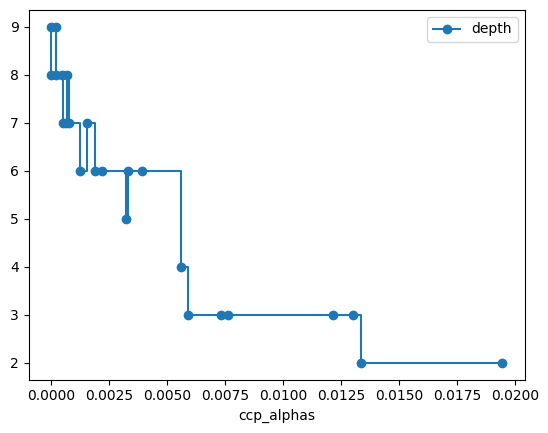

In [165]:
path[:-1].plot(x='ccp_alphas', y='depth', marker='o', drawstyle='steps-post')

Choosing .005 as the ccp_alpha for the postpruned tree

In [166]:
postpruned_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=10, max_features=.8, ccp_alpha=.005).fit(x_train,y_train)

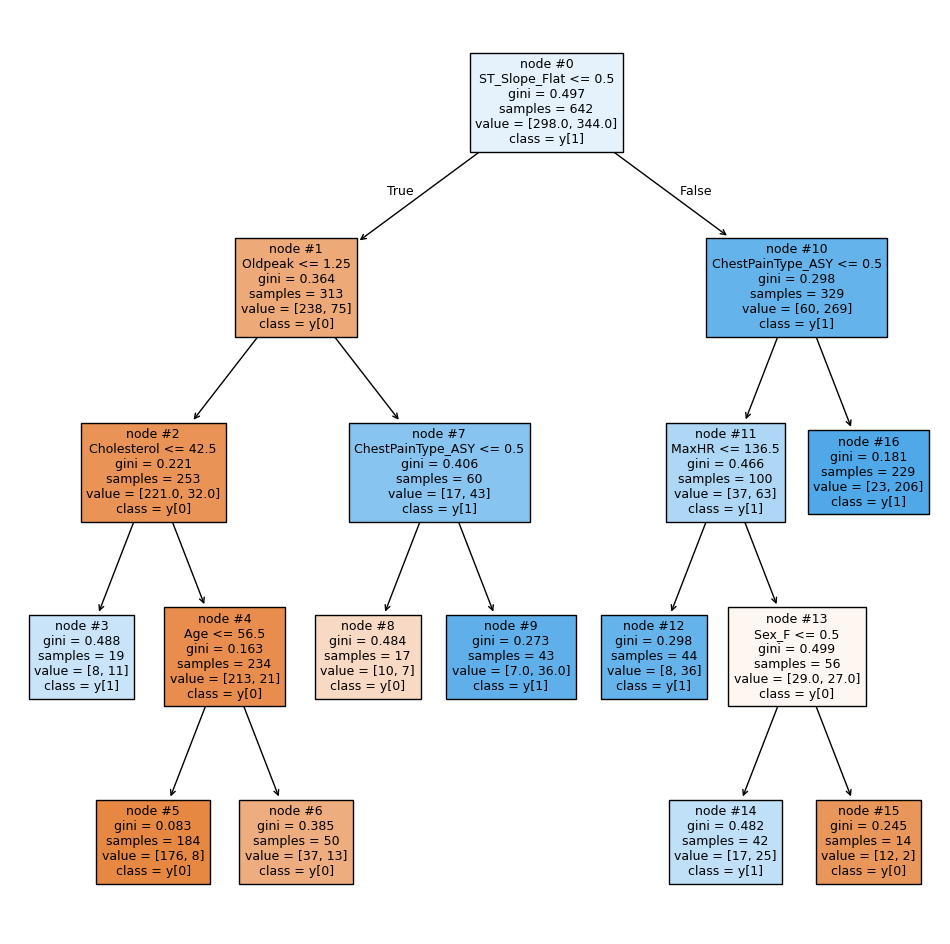

In [167]:
plt.figure(figsize=(12,12))
plot_tree(postpruned_tree, feature_names=x.columns, filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [168]:
score_train_postpruned_tree = postpruned_tree.score(x_train, y_train)
score_test_postpruned_tree = postpruned_tree.score(x_test, y_test)

In [169]:
train_scores = [score_train_unpruned_tree, score_train_prepruned_tree, score_train_postpruned_tree]
test_scores = [score_test_unpruned_tree, score_test_prepruned_tree, score_test_postpruned_tree]
model_list = ['unpruned_tree', 'prepruned_tree', 'postpruned_tree']
score_dict = {
    'train_score':train_scores,
    'test_score':test_scores
}
df_score = pd.DataFrame(score_dict, index=model_list)
df_score


,train_score,test_score
unpruned_tree,1.000000,0.753623
prepruned_tree,0.872274,0.840580
postpruned_tree,0.855140,0.858696
